# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [164]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_df = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [165]:
# Checking the number of mice.
mouse_data_df['Mouse ID'].nunique()

249

In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_array = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice_array

array(['g989'], dtype=object)

In [167]:
# # Optional: Get all the data for the duplicate mouse ID. 
# mouse_data_df['Mouse ID'].duplicated().sum()
duplicate_mice_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(duplicate_mice_array)]
duplicate_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# mouse_data_df.drop_duplicates(subset='Mouse ID', keep='last').shape

In [169]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(duplicate_mice_array) == False]


In [170]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [171]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_mouse_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_values = grouped_data['Tumor Volume (mm3)'].mean()
median_values = grouped_data['Tumor Volume (mm3)'].median()
variance_values = grouped_data['Tumor Volume (mm3)'].var()
std_deviation_values = grouped_data['Tumor Volume (mm3)'].std()
sem_values = grouped_data['Tumor Volume (mm3)'].sem()

# Calculate mean, median, variance, std, and SEM
summary_stats_1 = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Std Deviation': std_deviation_values,
    'SEM': sem_values})

# Rename columns for clarity
summary_stats_1.rename(columns = {'Mean' : 'Mean Tumor Volume', 'Median' : 'Median Tumor Volume', 'Variance' : 'Tumor Volume Variance', 'Std Deviation' : 'Tumor Volume Std. Dev.', 'SEM' : 'Tumor Volume SEM'}, inplace=True)
summary_stats_1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [172]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = clean_mouse_df.groupby('Drug Regimen')
summary_stats_2 = grouped_data.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}).reset_index()
summary_stats_2.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']
summary_stats_2

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

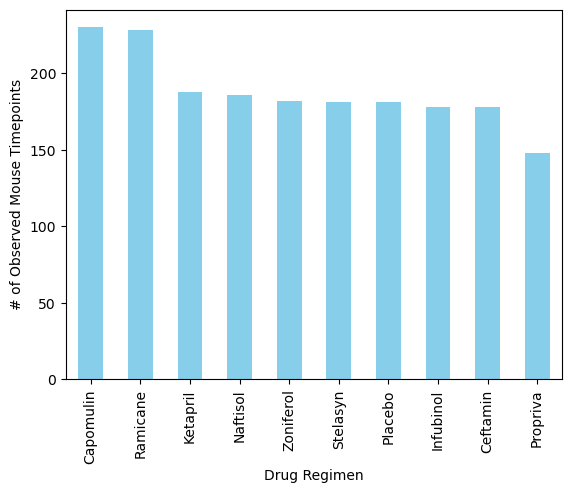

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mouse_df['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

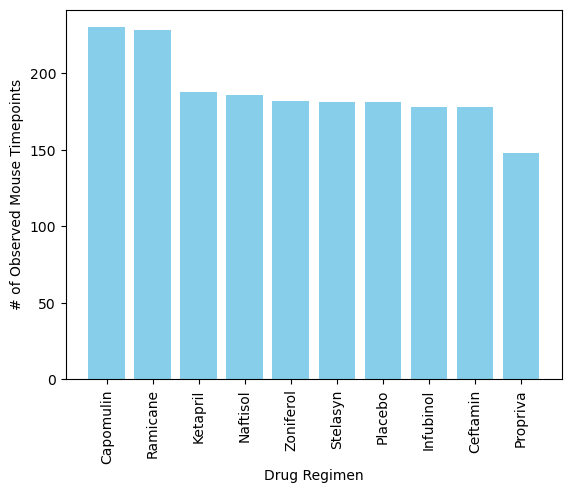

In [174]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Regimen' and count the number of rows
regimen_counts = clean_mouse_df['Drug Regimen'].value_counts()

# Extracting data for plotting
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using pyplot
plt.bar(regimens, counts, color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

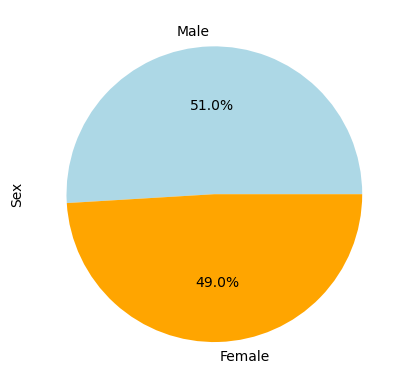

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by 'Sex' and count the number of mice for each gender
gender_distribution = clean_mouse_df['Sex'].value_counts()

# Create a pie plot using Pandas
ax = gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=0)

# Rename the ylabel
ax.set_ylabel('Sex')

# Show the plot
plt.show()

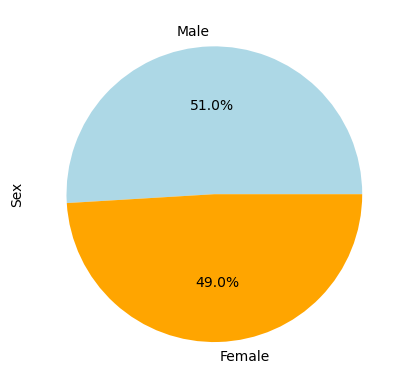

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by 'Sex' and count the number of mice for each gender
gender_distribution = clean_mouse_df['Sex'].value_counts()

# Extracting data for plotting
labels = gender_distribution.index
sizes = gender_distribution.values

# Create a pie plot using pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=0)

# Add title
plt.ylabel('Sex')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_mouse_df[clean_mouse_df['Drug Regimen'].isin(specific_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_regimen_df = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_regimen_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_regimen_df.loc[merged_regimen_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Identify potential outliers
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    # Print results
    print(f"Potential outliers for {treatment}: {outliers}")
    


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


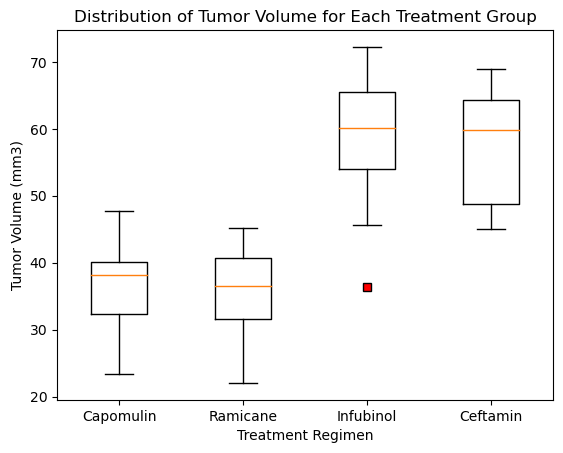

In [179]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='s'))

# Adding the labels/titles
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Showing the plot
plt.show()

## Line and Scatter Plots

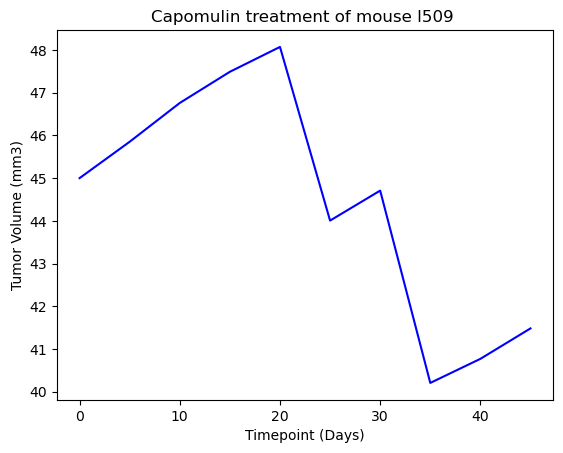

In [180]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'l509'
selected_mouse_data = clean_mouse_df[(clean_mouse_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_df['Mouse ID'] == selected_mouse_id)]

# Plotting tumor volume vs. time point and adding labels/titles
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], linestyle='-', color='blue')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse_id} ')

# Showing the plot
plt.grid(False)
plt.show()

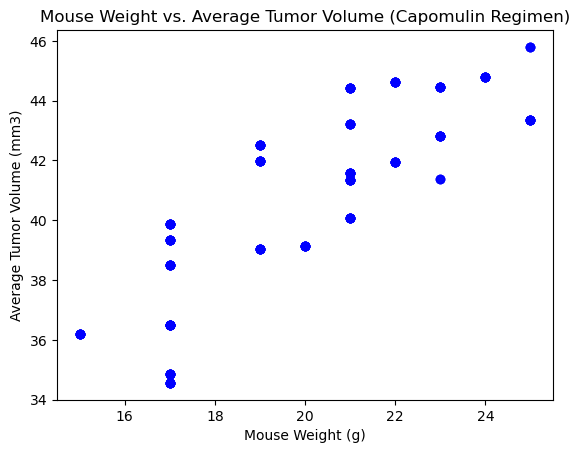

In [181]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with the original Capomulin data to include mouse weight
merged_capomulin_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Create a scatter plot and add labels/titles
plt.scatter(merged_capomulin_data['Weight (g)'], merged_capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue', alpha=0.75)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Showin the plot
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is 0.83


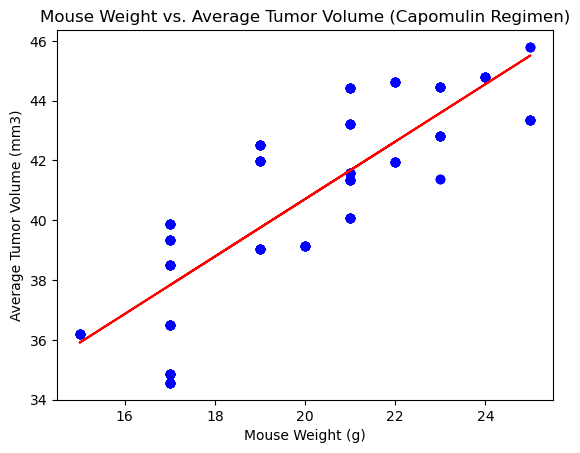

In [182]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with the original Capomulin data to include mouse weight
merged_capomulin_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(merged_capomulin_data['Weight (g)'], merged_capomulin_data['Tumor Volume (mm3)'])[0], 2)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_capomulin_data['Weight (g)'], merged_capomulin_data['Tumor Volume (mm3)'])

# Create the scatter plot
plt.scatter(merged_capomulin_data['Weight (g)'], merged_capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue', alpha=0.75)

# Add regression line to the plot and adding labels/titles
regression_line = slope * merged_capomulin_data['Weight (g)'] + intercept
plt.plot(merged_capomulin_data['Weight (g)'], regression_line, color='red')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Display correlation coefficient
print(f'The correlation between the mouse weight and the average tumor volume is {correlation_coefficient}')

# Showing the plot
plt.show()